In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("results.csv")
df.head(5)

,Hours,StudentId,Result
0,1.0,10,Fail
1,1.2,15,Fail
2,1.5,21,Fail
3,1.7,16,Fail
4,2.0,14,Fail


In [3]:
df.shape

(20, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Hours      18 non-null     float64
 1   StudentId  20 non-null     int64  
 2   Result     20 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 464.0+ bytes


In [5]:
df1=df.drop("StudentId",axis=1)


In [6]:
df1.describe()

,Hours
count,18.000000
mean,2.716667
std,1.251000
min,0.500000
25%,1.775000
50%,2.700000
75%,3.650000
max,5.000000


<AxesSubplot:xlabel='Result', ylabel='count'>

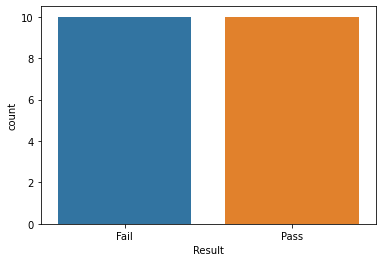

In [7]:
sns.countplot(x="Result",data=df)

Text(0, 0.5, 'Pass')

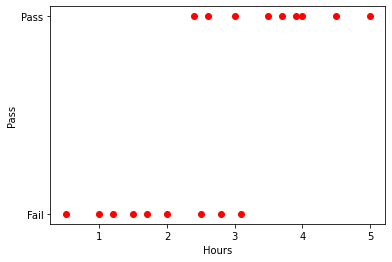

In [42]:
plt.scatter(df.Hours,df.Result,color='red')
plt.xlabel("Hours")
plt.ylabel("Pass")

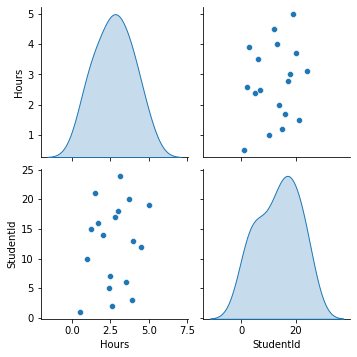

In [8]:
sns.pairplot(df,diag_kind='kde')

In [9]:
df.isnull().sum()

Hours        2
StudentId    0
Result       0
dtype: int64

### Drop the null values

In [10]:
df.dropna(inplace=True)
df.shape

(18, 3)

### Drop the column which is not needed for analysis

In [11]:
df1=df.drop("StudentId",axis=1)
df1.head()

,Hours,Result
0,1.0,Fail
1,1.2,Fail
2,1.5,Fail
3,1.7,Fail
4,2.0,Fail


## Convert string data types to discrete 

In [12]:
result=pd.get_dummies(df["Result"])
result.head(3)


,Fail,Pass
0,1,0
1,1,0
2,1,0


In [13]:
result=pd.get_dummies(df["Result"],drop_first=True)
result.head(3)

,Pass
0,0
1,0
2,0


In [14]:
df1=pd.concat([df1,result],axis=1)
df1.head(3)

,Hours,Result,Pass
0,1.0,Fail,0
1,1.2,Fail,0
2,1.5,Fail,0


In [15]:
df1=df1.drop("Result",axis=1)
df1.head(3)

,Hours,Pass
0,1.0,0
1,1.2,0
2,1.5,0


## Assign features to x and y

In [30]:
x=df1.iloc[:,0:1]
x.head(3)

,Hours
0,1.0
1,1.2
2,1.5


In [31]:
y=df1.iloc[:,1:]
y.head(3)

,Pass
0,0
1,0
2,0


## Train and test the data

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [19]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [20]:
log_reg.fit(xtrain,ytrain)

c:\softwares\python_virtual\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

### Confusion Matrix

In [32]:
predictions=log_reg.predict(xtest)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,predictions)
print (cm)

[[2 1]
 [0 1]]


In [22]:
from sklearn.metrics import classification_report

In [23]:
classification_report(ytest,predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      0.67      0.80         3\n           1       0.50      1.00      0.67         1\n\n    accuracy                           0.75         4\n   macro avg       0.75      0.83      0.73         4\nweighted avg       0.88      0.75      0.77         4\n'

## Accuracy Score

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predictions)

0.75

### Prediction

In [39]:
predict=log_reg.predict_proba(xtest)
print (predict)

[[0.33864801 0.66135199]
 [0.67677464 0.32322536]
 [0.30785719 0.69214281]
 [0.8954164  0.1045836 ]]


In [44]:
log_reg.predict(np.array([[7]]))

array([1], dtype=uint8)

In [45]:
log_reg.predict_proba(np.array([[7]]))

array([[0.00182823, 0.99817177]])

In [47]:
print (log_reg.predict(np.array([[1.7]])))
print (log_reg.predict_proba(np.array([[1.7]])))


[0]
[[0.76160201 0.23839799]]
